In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
from pathlib import Path

In [2]:
pi_dir = Path("../Experiments_New/pi")
dnn_dir = Path("../Experiments/dnn_s")

In [3]:
pi_tracks = sorted(list(pi_dir.glob("*/*.pickle")))
dnn_tracks = sorted(list(dnn_dir.glob("*/*.pickle")))
pi_tracks, dnn_tracks

([PosixPath('../Experiments_New/pi/alpine-2/episode_1.pickle'),
  PosixPath('../Experiments_New/pi/alpine-2/episode_2.pickle'),
  PosixPath('../Experiments_New/pi/dirt-1/episode_1.pickle'),
  PosixPath('../Experiments_New/pi/dirt-1/episode_2.pickle'),
  PosixPath('../Experiments_New/pi/dirt-2/episode_1.pickle'),
  PosixPath('../Experiments_New/pi/dirt-2/episode_2.pickle'),
  PosixPath('../Experiments_New/pi/dirt-3/episode_1.pickle'),
  PosixPath('../Experiments_New/pi/dirt-3/episode_2.pickle'),
  PosixPath('../Experiments_New/pi/e-track-2/episode_1.pickle'),
  PosixPath('../Experiments_New/pi/e-track-2/episode_2.pickle'),
  PosixPath('../Experiments_New/pi/ruudskogen/episode_1.pickle'),
  PosixPath('../Experiments_New/pi/ruudskogen/episode_2.pickle'),
  PosixPath('../Experiments_New/pi/spring/episode_1.pickle'),
  PosixPath('../Experiments_New/pi/spring/episode_2.pickle'),
  PosixPath('../Experiments_New/pi/wheel-1/episode_1.pickle'),
  PosixPath('../Experiments_New/pi/wheel-1/episode_

### Track wise


In [4]:
def read_track(track_file):
    d = None
    with open(track_file, "rb") as f:
        d = pickle.load(f)
    return d

def read_model(files):
    files_to_read = []
    data = []
    _ = [files_to_read.extend(f) for f in files]
    for f in files_to_read:
        with open(f, "rb") as f:
            d = pickle.load(f)
        data.extend(d)
    return data

In [5]:
pi_data = [pd.DataFrame(read_track(track_file.as_posix())) for track_file in pi_tracks]
dnn_data = [pd.DataFrame(read_track(track_file.as_posix())) for track_file in dnn_tracks]



In [6]:
dt = 0.1
steering_angles = dnn_data[0]['steer'].values

steering_vel = np.diff(steering_angles) / dt 

steering_acc = np.diff(steering_vel) / dt
jerk = np.diff(steering_acc) / dt  

np.mean(jerk)

1.0081793

In [7]:
dt = 0.1
steering_angles = pi_data[0]['steer'].values

steering_vel = np.diff(steering_angles) / dt 

steering_acc = np.diff(steering_vel) / dt

jerk = np.diff(steering_acc) / dt  

np.mean(jerk)

0.66833496

(-1.5, 1.5)

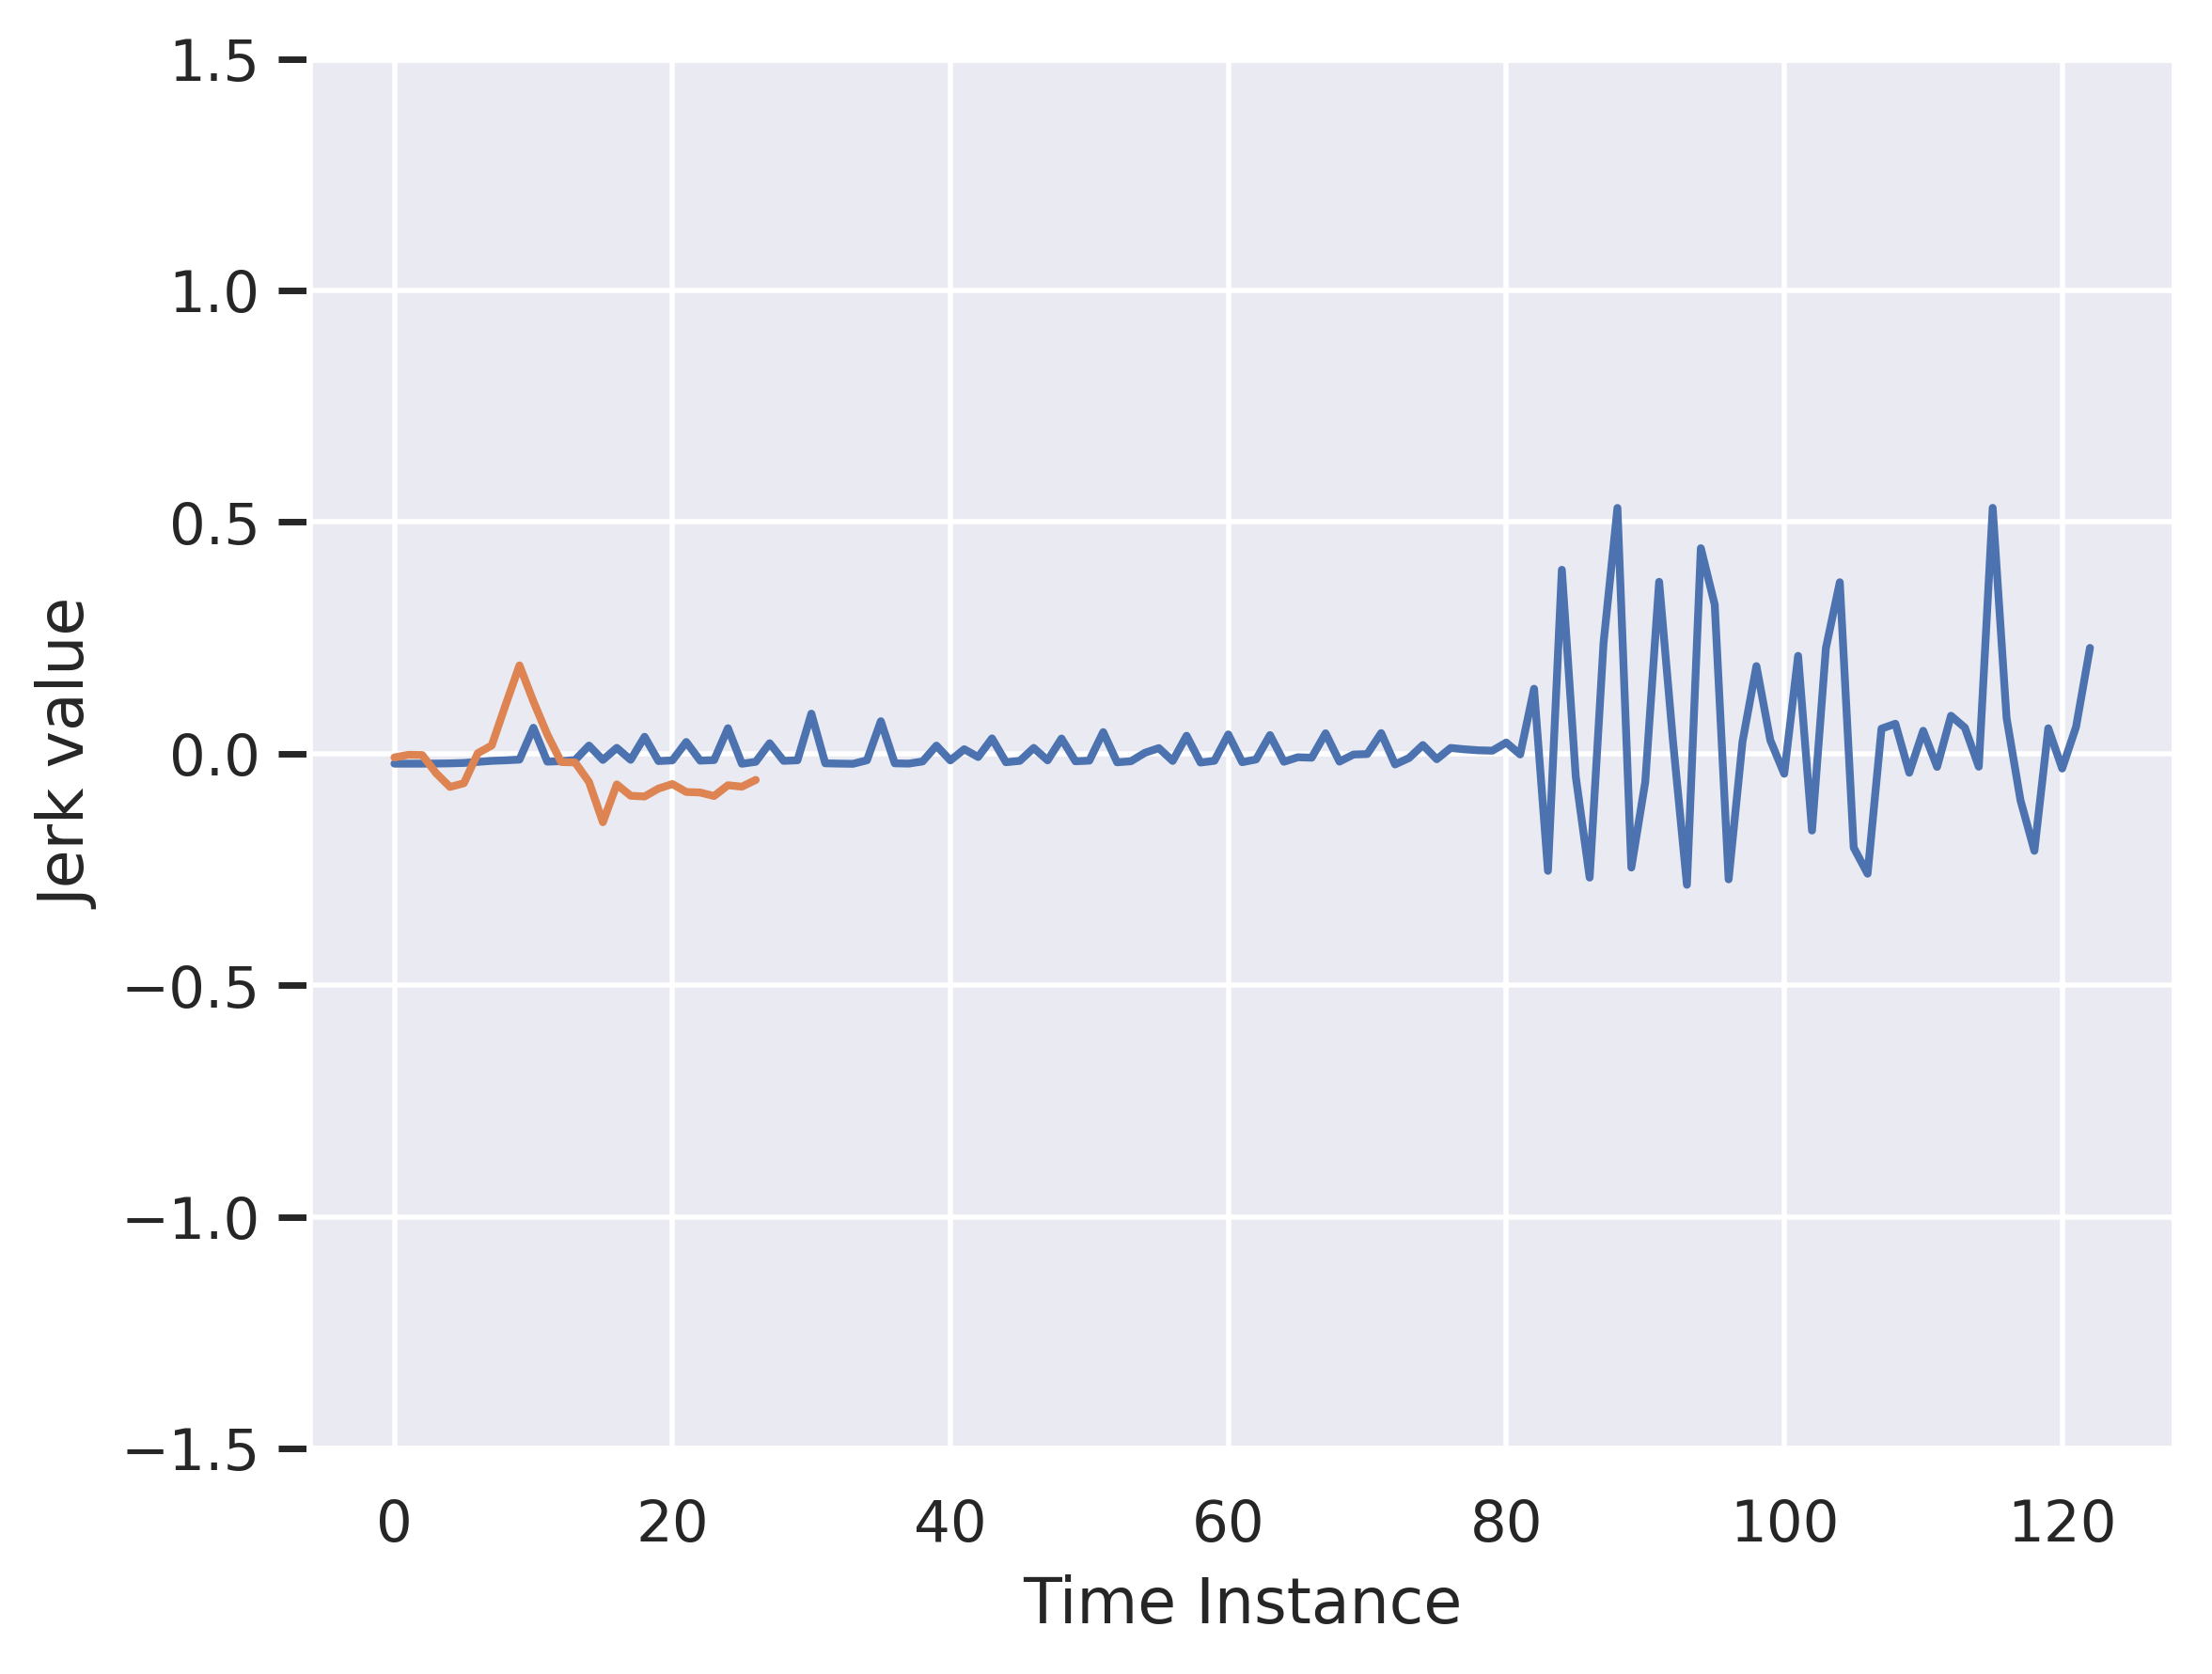

In [8]:
fig, ax = plt.subplots(dpi=400)

sns.lineplot(pi_data[0]['steer'].values)
sns.lineplot(dnn_data[0]['steer'].values)

ax.tick_params(bottom=False, left=True)
ax.set_ylabel("Jerk value")
ax.set_xlabel("Time Instance")

ax.set_ylim(-1.5, 1.5)

#fig.savefig("avg_jerk_s.png")

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

In [10]:
pi, dnn

NameError: name 'pi' is not defined

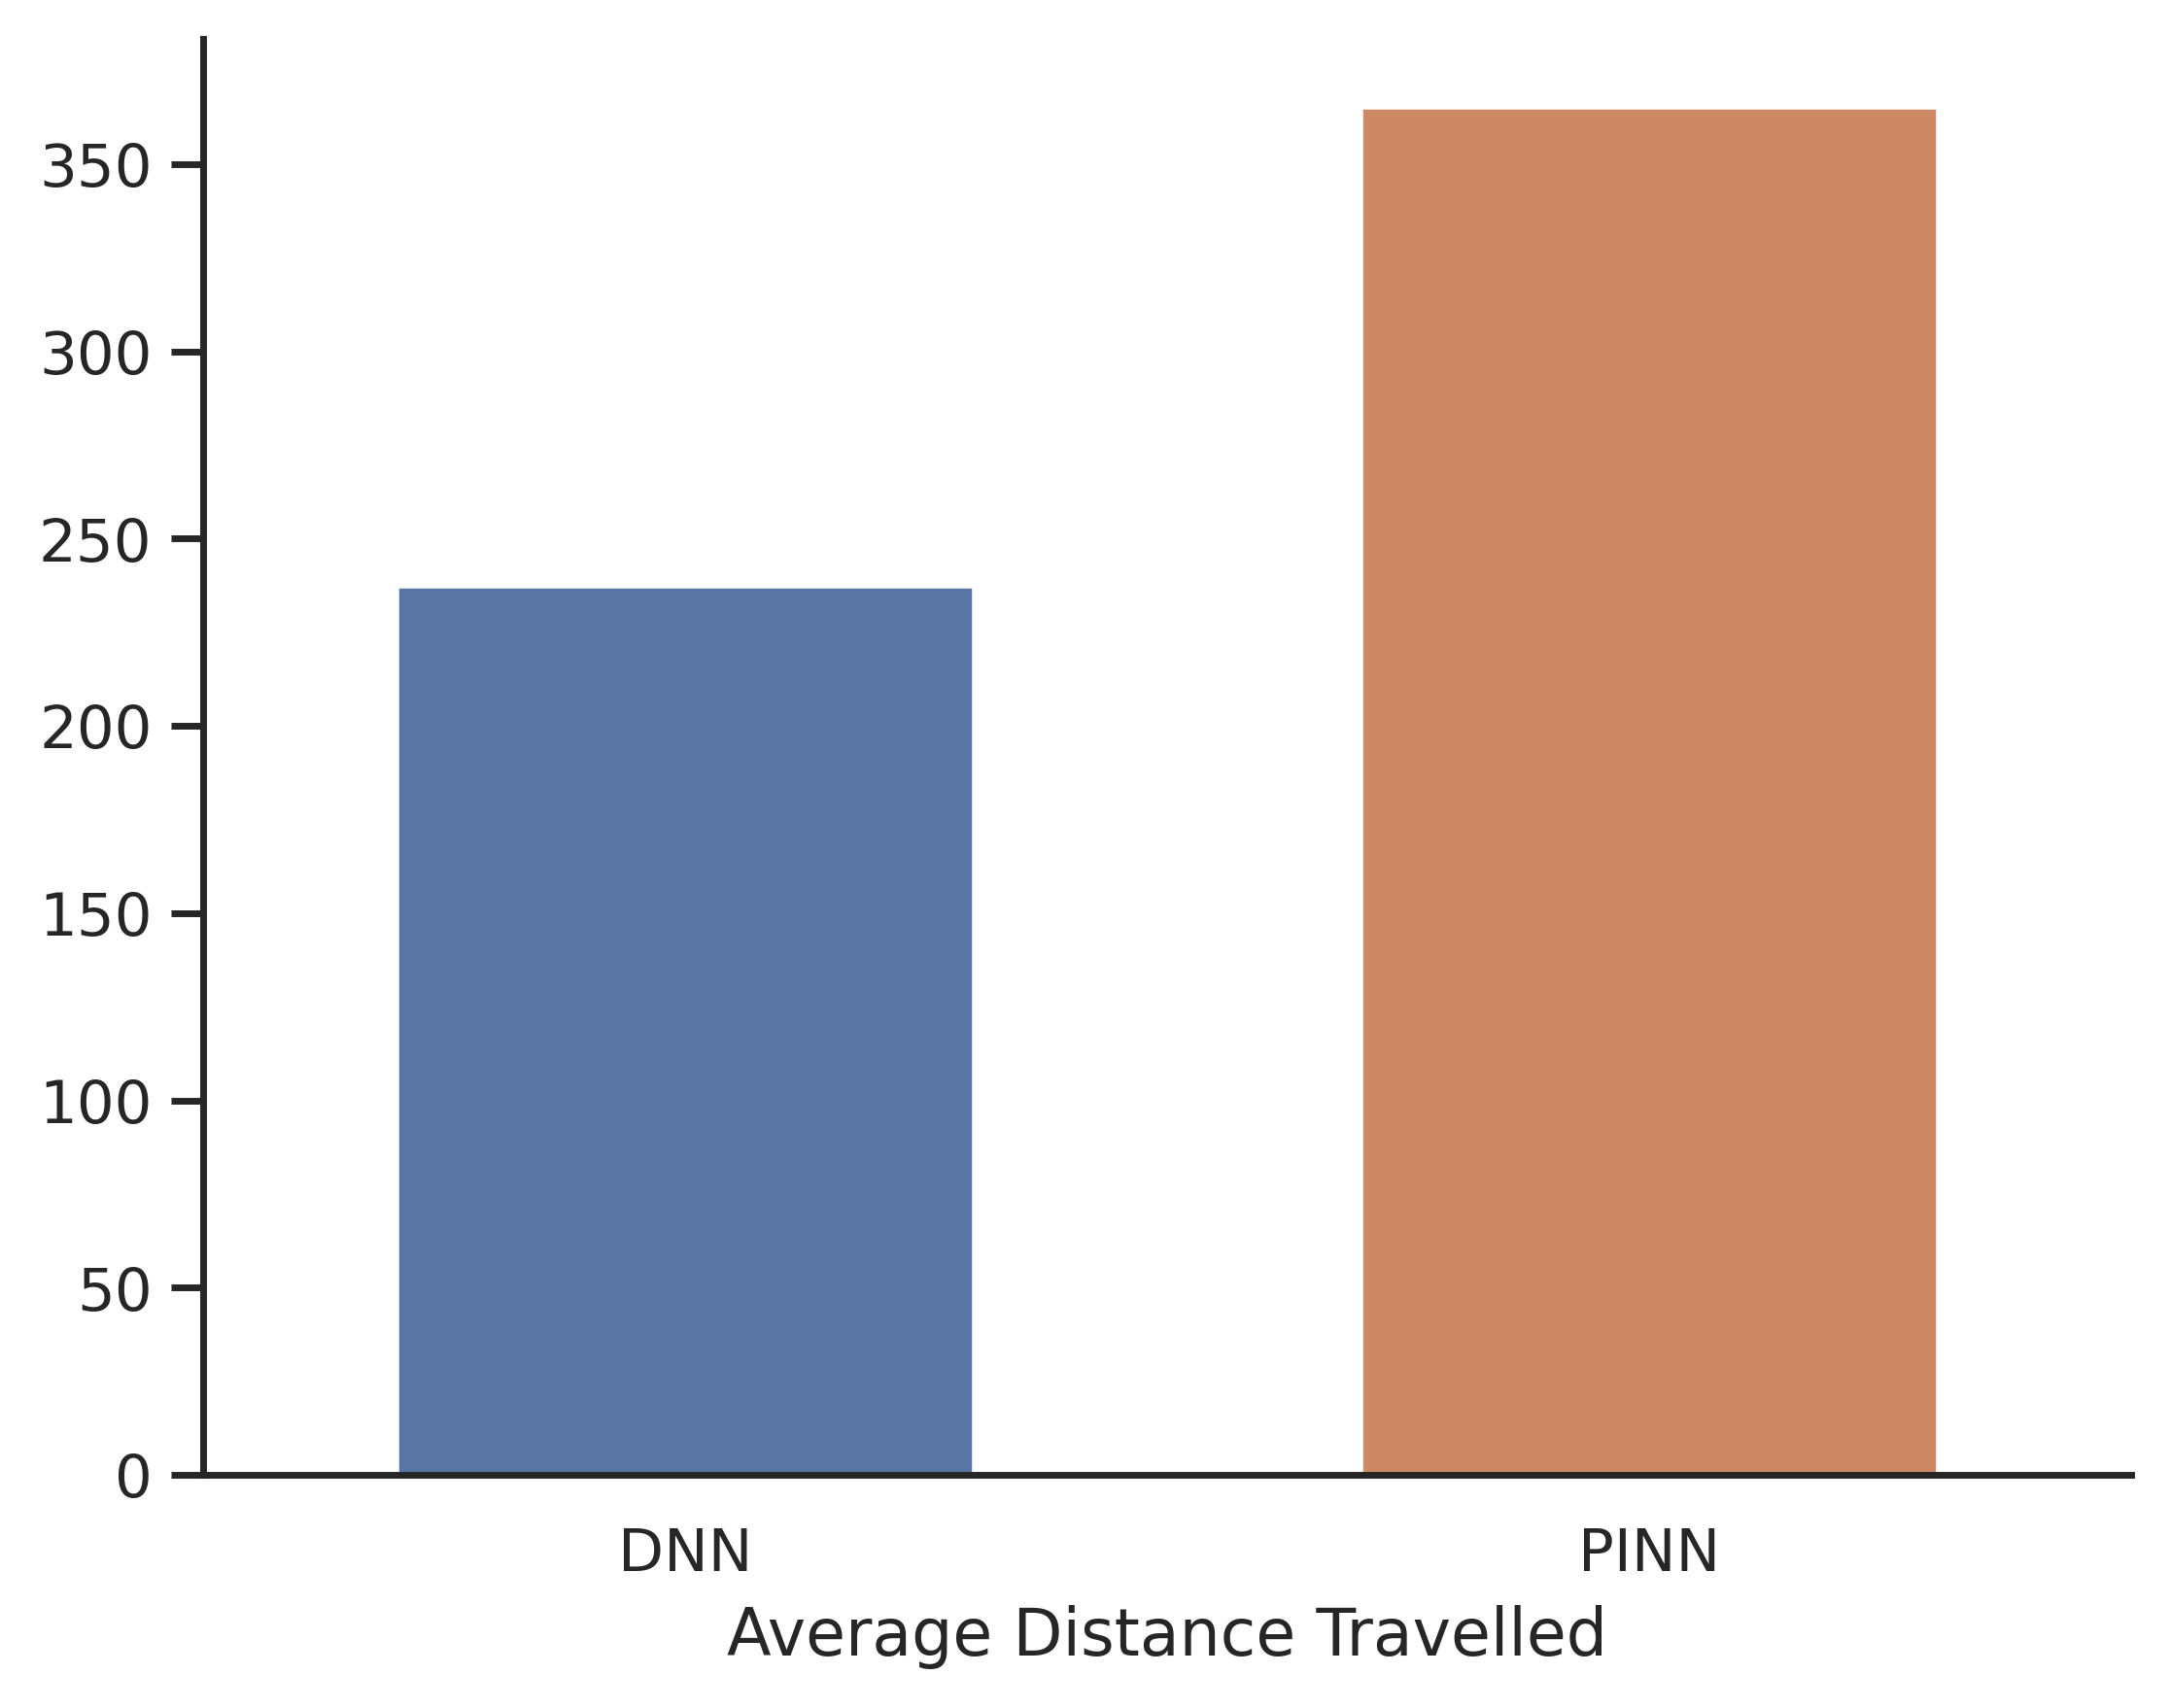

In [11]:

# Dist covered
pi = np.mean([np.max(df['distRaced']) for df in pi_data])
dnn = np.mean([np.max(df['distRaced']) for df in dnn_data])


fig, ax = plt.subplots(dpi=400)

ax=sns.barplot(x=['DNN', 'PINN'], y=[dnn, pi], width=0.6)

ax.tick_params(bottom=False, left=True)
ax.set_xlabel("Average Distance Travelled")

fig.savefig("avg_dist_m.png")

([<matplotlib.axis.XTick at 0x7fafc3e28bb0>,
 [Text(0.0, 0, 'DNN'), Text(0.25, 0, 'PINN')])

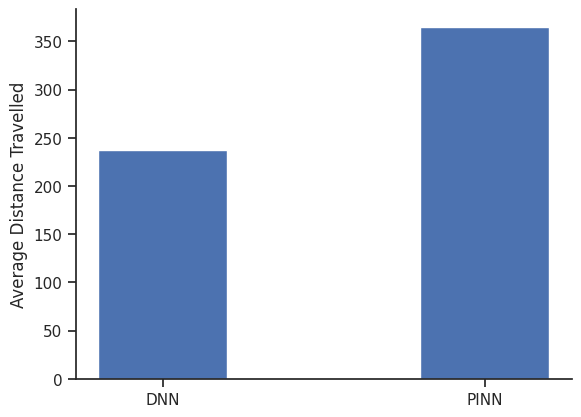

In [13]:
x_pos = np.arange(0, 0.5, 0.25)
# Dist covered
pi = np.mean([np.max(df['distRaced']) for df in pi_data])
dnn = np.mean([np.max(df['distRaced']) for df in dnn_data])

plt.bar(x_pos, [dnn, pi], width=0.1, align='center')
plt.ylabel("Average Distance Travelled")

plt.xticks(x_pos, ['DNN','PINN'])

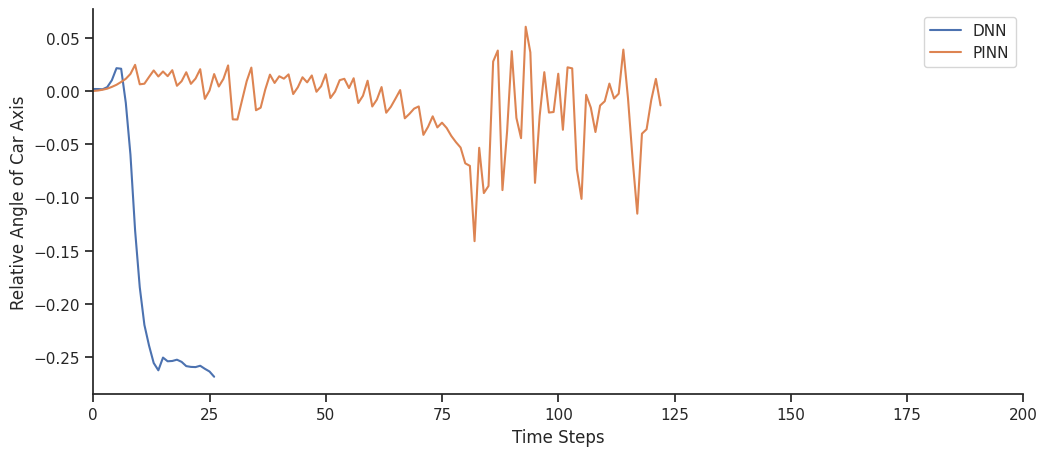

In [14]:
plt.figure(figsize=(12, 5))
plt.plot(dnn_data[0]['angle'])
plt.plot(pi_data[0]['angle'])
plt.xlim(0, 200)

plt.ylabel("Relative Angle of Car Axis")
plt.xlabel("Time Steps")
plt.legend(['DNN','PINN'])

In [117]:
plt.figure(figsize=(12, 5))
plt.plot(pp_data[1]['steer'])
plt.plot(dnn_data[1]['steer'])
plt.plot(pi_data[1]['steer'])

plt.xlim(0, 200)

plt.ylabel("Steering Angle")
plt.xlabel("Time Steps")
plt.legend(['Pure-Physics', 'Basic-BC','Physics-inspired-BC (ours)'])

NameError: name 'pp_data' is not defined

<Figure size 1200x500 with 0 Axes>

In [202]:
pp_data = [pd.DataFrame(read_track(data_dir[:1])) for data_dir in [pp_track_new]]
pi_data = [pd.DataFrame(read_track(data_dir[:1])) for data_dir in [pi_track_new]]



In [204]:
pp_data

[        angle   distRaced  trackPos     speedX     speedY    speedZ     steer   
 0    0.002626   -0.010498 -0.333208  -0.242614   0.001294  0.019782  0.000000  \
 1    0.002717    0.059326 -0.333214   2.875270   0.017514  0.152309  0.000000   
 2    0.002627    0.299316 -0.333367   5.721970  -0.010166  0.337194  0.000000   
 3    0.002518    0.710693 -0.333521   9.078430   0.008275  0.541281  0.000000   
 4    0.002467    1.300050 -0.333735  12.296100   0.000616  0.717832  0.000000   
 ..        ...         ...       ...        ...        ...       ...       ...   
 133 -0.561924  286.575000 -0.701051  77.289500  -4.233650  1.557360 -0.684905   
 134 -0.562449  290.901000 -0.227053  73.050700   7.086070  1.636190 -1.000000   
 135 -0.431906  293.921000  0.268514  65.006300  17.325100  1.474060 -1.000000   
 136 -0.238651  296.284000  0.711419  54.775900  22.821100  1.219010 -1.000000   
 137  0.069583  298.921000  1.016420  45.010100  22.842400  0.739555 -1.075000   
 
      accel  l

Text(0, 0.5, 'Average Distance Travelled')

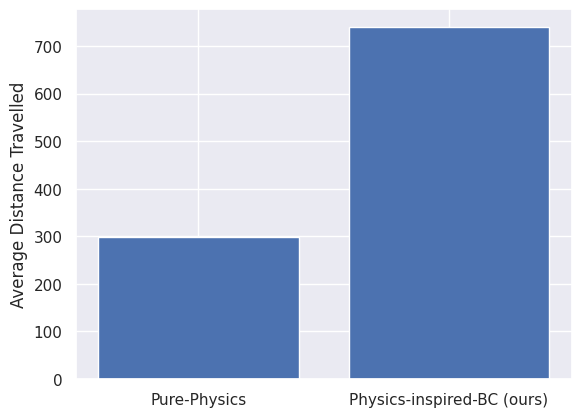

In [205]:
# Dist covered
pp = np.mean([np.max(df['distRaced']) for df in pp_data])
pi = np.mean([np.max(df['distRaced']) for df in pi_data])

plt.bar(['Pure-Physics','Physics-inspired-BC (ours)'], [pp, pi])
plt.ylabel("Average Distance Travelled")


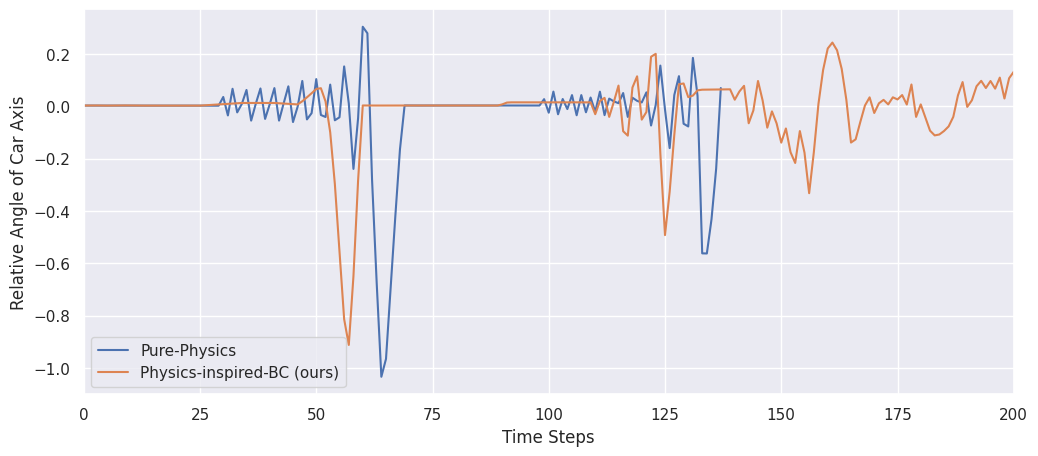

In [206]:
plt.figure(figsize=(12, 5))
plt.plot(pp_data[0]['angle'])
plt.plot(pi_data[0]['angle'])
plt.xlim(0, 200)

plt.ylabel("Relative Angle of Car Axis")
plt.xlabel("Time Steps")
plt.legend(['Pure-Physics','Physics-inspired-BC (ours)'])

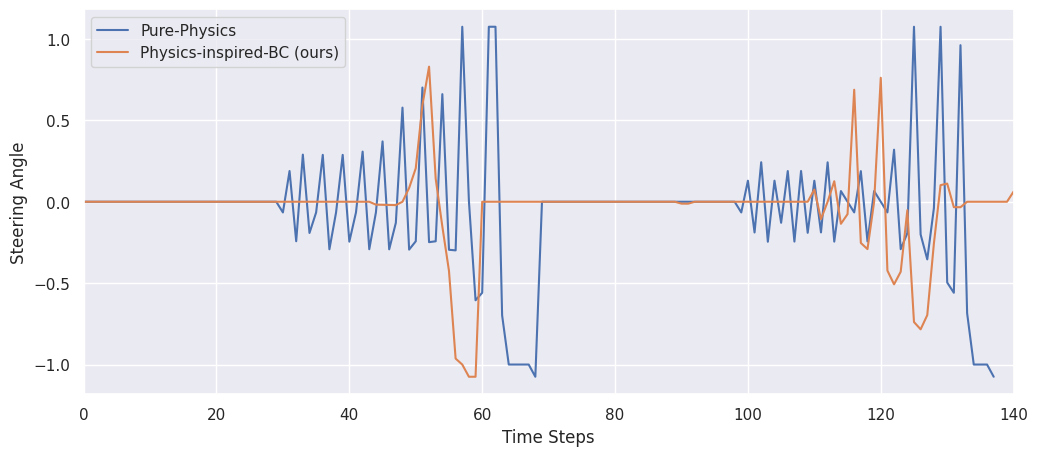

In [210]:
plt.figure(figsize=(12, 5))
plt.plot(pp_data[0]['steer'])
plt.plot(pi_data[0]['steer'])

plt.xlim(0, 140)

plt.ylabel("Steering Angle")
plt.xlabel("Time Steps")
plt.legend(['Pure-Physics', 'Physics-inspired-BC (ours)'])

In [ ]:
pp_data = [pd.DataFrame(read_track(data_dir[:1])) for data_dir in [pp_track_1,pp_track_2,pp_track_3]]
pi_data = [pd.DataFrame(read_track(data_dir[:1])) for data_dir in [pi_track_1,pi_track_2,pi_track_3]]
dnn_data = [pd.DataFrame(read_track(data_dir[:1])) for data_dir in [dnn_track_1,dnn_track_2,dnn_track_3]]



# Dist covered
pp = np.mean([np.max(df['distRaced']) for df in pp_data])
pi = np.mean([np.max(df['distRaced']) for df in pi_data])
dnn = np.mean([np.max(df['distRaced']) for df in dnn_data])

plt.bar(['Pure-Physics', 'Basic-BC','Physics-inspired-BC (ours)'], [pp, dnn, pi])
plt.ylabel("Average Distance Travelled")


plt.figure(figsize=(12, 5))
plt.plot(pp_data[1]['angle'])
plt.plot(dnn_data[1]['angle'])
plt.plot(pi_data[1]['angle'])
plt.xlim(0, 200)

plt.ylabel("Relative Angle of Car Axis")
plt.xlabel("Time Steps")
plt.legend(['Pure-Physics', 'Basic-BC','Physics-inspired-BC (ours)'])

plt.figure(figsize=(12, 5))
plt.plot(pp_data[1]['steer'])
plt.plot(dnn_data[1]['steer'])
plt.plot(pi_data[1]['steer'])

plt.xlim(0, 200)

plt.ylabel("Steering Angle")
plt.xlabel("Time Steps")
plt.legend(['Pure-Physics', 'Basic-BC','Physics-inspired-BC (ours)'])